# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [121]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import datasets



In [122]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [123]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_3', KMeans(n_clusters=3)), 
              ('k_means_8_random', KMeans(n_clusters=8, init='random')),
              ('k_means_5_random', KMeans(n_clusters=5, init='random')),
              ('k_means_3_random', KMeans(n_clusters=3, init='random'))]
estimator = KMeans(n_clusters=3)

In [124]:
est = estimator
est.fit(X, y)
labels = est.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

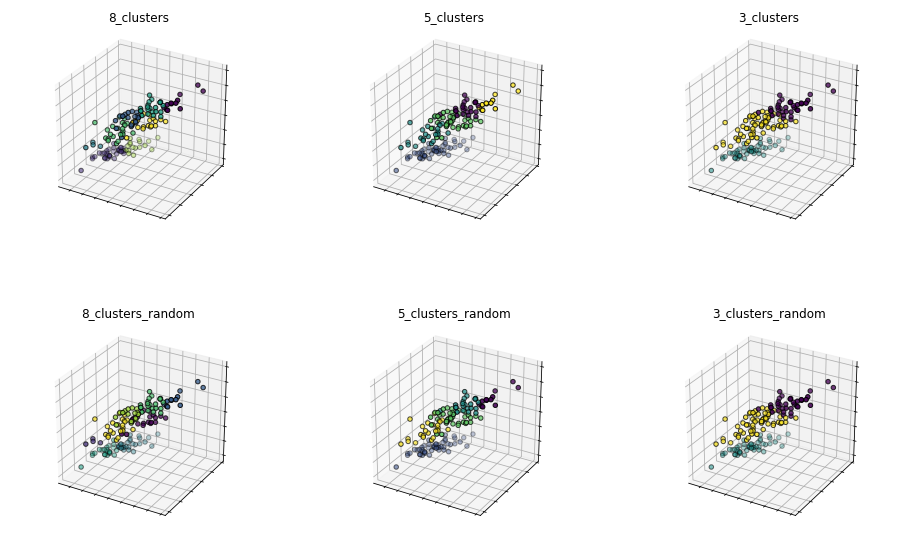

In [125]:
fignum = 1
titles = ['8_clusters', '5_clusters', '3_clusters', '8_clusters_random', '5_clusters_random', '3_clusters_random']
fig = plt.figure(fignum, figsize=(16,10))
for name, est in estimators:
#     ax = Axes3D(fig, rect=[0, 0, 0.95, 1])
    ax = fig.add_subplot(2, 3, fignum, projection='3d')
    
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum + 1
    
plt.show()

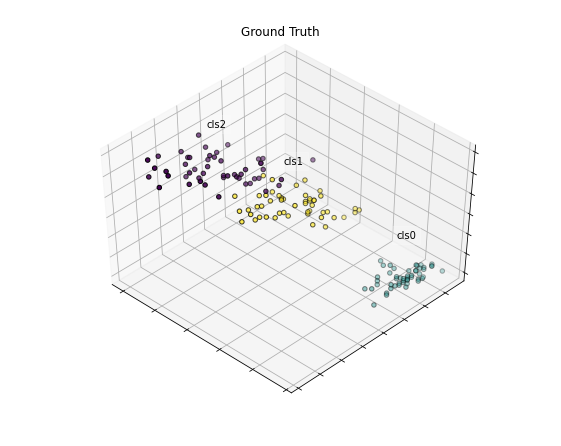

In [126]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12